<h4>Problem Statement:</h4>


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.<br/>
The company is finding it very difficult to sustain in the current market scenario. <br/>
So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br/>
The company wants to understand:<br/>
 -  Which variables are significant in predicting the demand for shared bikes.
 -  How well those variables describe the bike demands.

<b>Goal:<b></br>
 1. To build a model with the given dataset
 2. Use the model to understand how the demand varies with respect to the different features.
 3. The model must be useful to manipulate the strategy to meet the demand levels


<h5>Information Provided about the data set:</h5>
'season' has values as 1, 2, 3, 4 which have specific labels associated with them (1: spring, 2: summer, 3: fall, 4: winter)<br/>
'weathersit' has values as 1, 2, 3, 4 which have specific labels associated with them (1: (Clear, Few clouds, Partly Cloudy), 2: (Mist+(Cloudy, Broken Clouds, Few Clouds), Mist), 3: (Light Snow, Light Rain+Thunderstorm+Scattered Clouds, Light Rain+Scattered Clouds), 4: (Heavy Rain+Ice Pallets+Thunderstorm+Mist, Snow+Fog) ). <br/>
The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respective>t. 


<b>Target Variable:</b><br/>
The variable 'casual' indicates the number casual users who have made a rental.<br/>
The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. <br/>
Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.<br/>
The model should be built taking this 'cnt' as the target variable

<h4>Step 1: Reading and Understanding the Data</h4>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [131]:
#importing the required packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
#Reading the data
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b>Meaning of the Columns using data dictionary</b><br>
instant -> record index <br/>
dteday -> date <br/>
mnth -> month(1 to 12) <br/>
holiday -> whether its a holiday or not <br/>
weekday -> day of the week <br/>
workingday -> if day is neither weekend nor holiday then 1, else 0 <br/>
temp -> temperature in celsius<br/>
atemp -> feeling temperature in celsius <br/>
hum -> humidity <br/>
windspeed -> windspeed <br/>

Date Related variables are dteday, mnth<br/>
weather related variables are atemp, temp, hum, windspeed

In [133]:
#Let us check the information in the dataset using the imported libraries
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [134]:
#Our data has 730 entries and 16 features(variables)
#There are no null values in our data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [135]:
#checking for duplicate rows if any 
bike_dup = bike_data.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [136]:
#There are no duplicate rows in our data
#We can proceed with our data visualisation
#Since our target variable is 'cnt', we can safely drop 'casual' and 'registered' columns from our data
bike_data.drop(['casual'], axis = 1, inplace = True)
bike_data.drop(['registered'], axis = 1, inplace = True)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
bike_data.shape

(730, 14)

In [138]:
#instant acts as a record index and doesnt contribute to our analysis
bike_data.drop(['instant'], axis = 1, inplace = True)
print(bike_data.shape)
bike_data.head()

(730, 13)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [139]:
#dteday provides us with the date of a particular day
#However we have all the information we need from a particular day in other columns - workingday, mnth, yr, holiday
#So we can drop this column as well as it wont contribute anything more to our analysis
bike_data.drop(['dteday'], axis = 1, inplace = True)
print(bike_data.shape)
bike_data.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

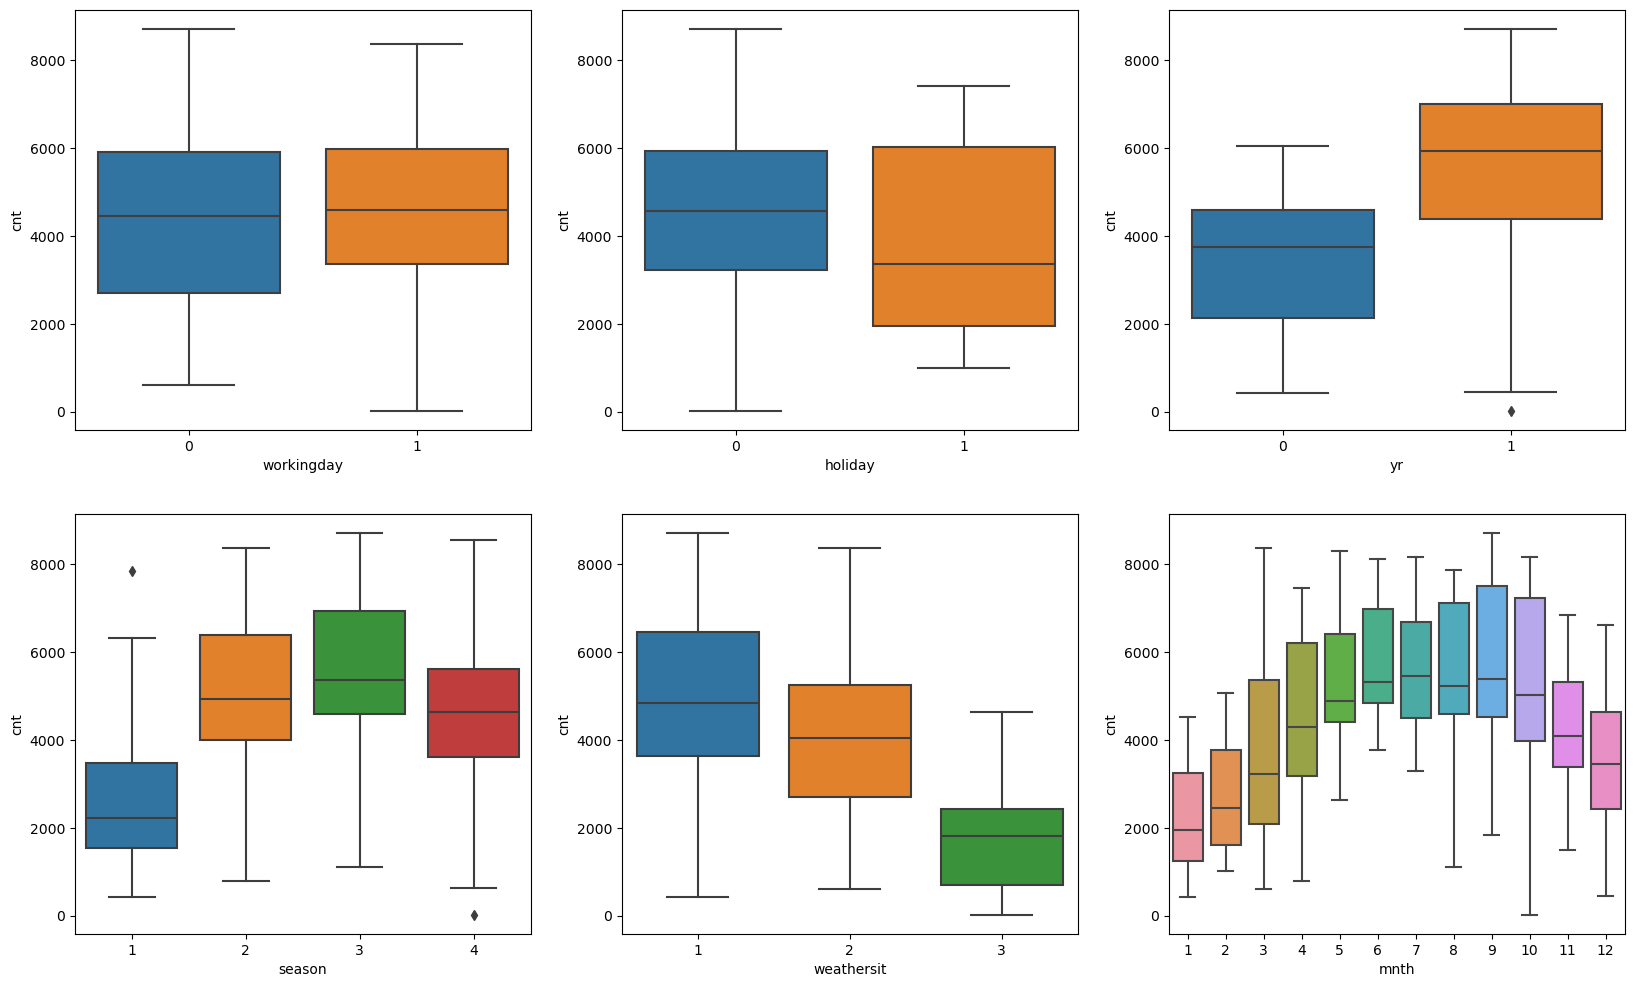

In [140]:
#Visualising variables with respect to the target variable  (Categorical variables)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.show()

We can infer the following from the plots:<br/>
 1. From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.
 2. Bikes have been taken out less during the holidays.
 3. Compared to 2018, 2019 saw an increase in the users, which might indicate that trends are moving towards bike sharing
 4. Fall season is when users find it optimal to use bikes. Spring is when bikes arent that preferred.
 5. Weather plays a huge role as can be seen. The days when there is heavy rain, there is no scope for sharing a bike. When the days are clear and when there is mist is when users usually prefer riding bikes
 6. The distribution of data across months also supports the inferences from weather and season plots

In [141]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<Figure size 1500x3000 with 0 Axes>

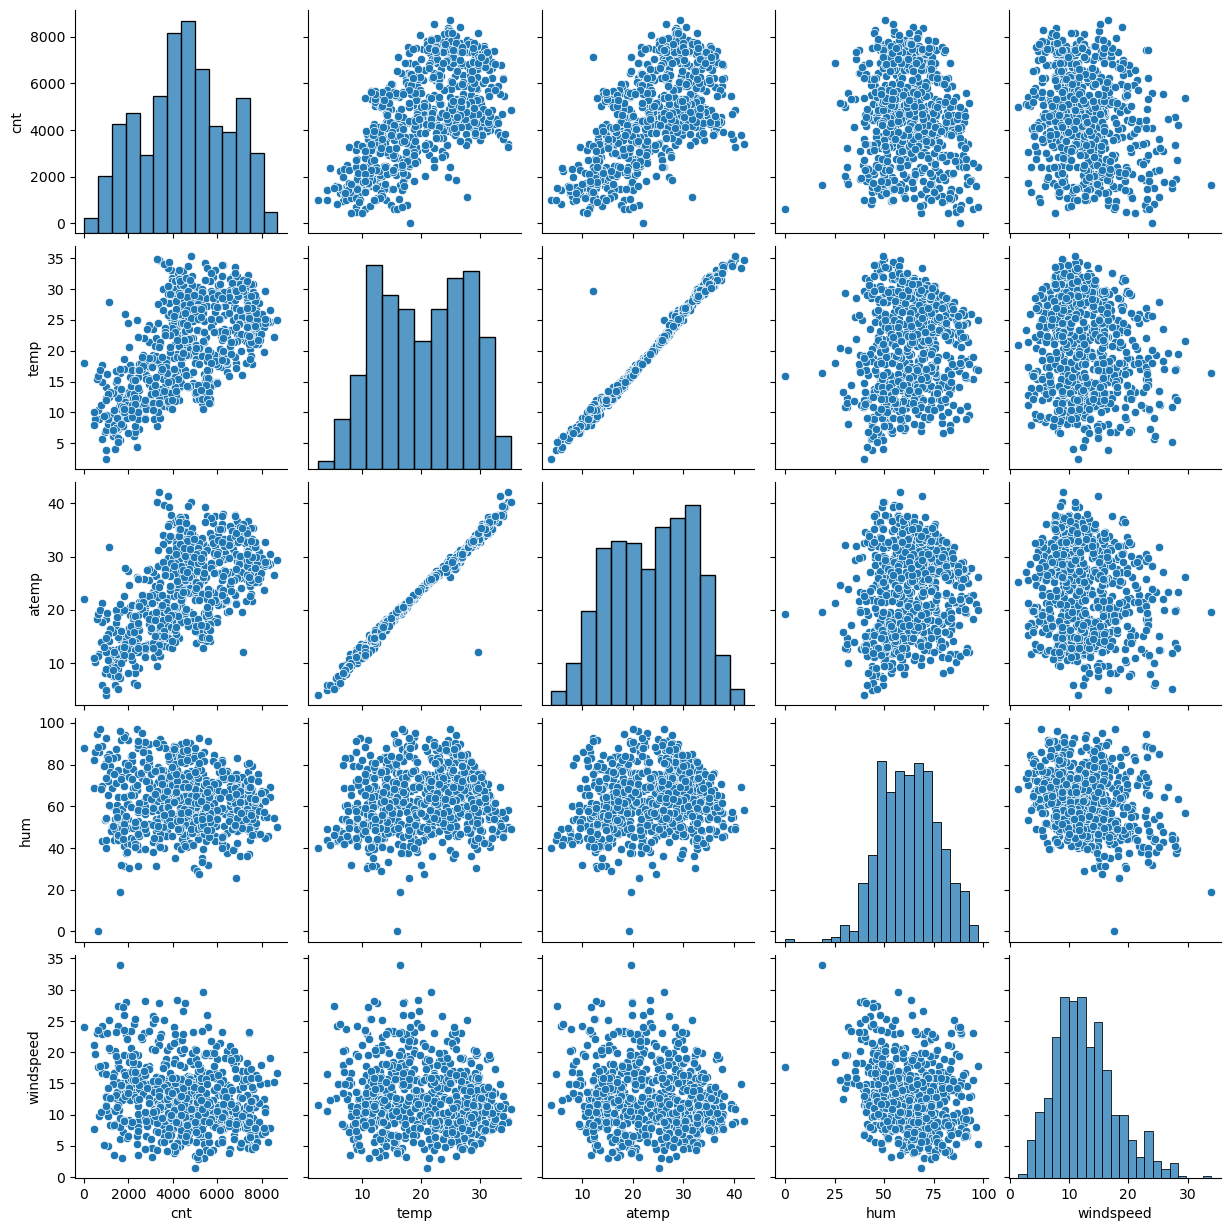

In [142]:
#Draw +ots for weather data (numerical variables)
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Looks like the target variable has a linear relationship with variables like temp and atemp.
<br/>Also all the weather variables and the target variable have a normal distibution.
<br/>We can also notice the correlation between temp and atemp which is linear.
<br/>We can safely assume that a <b>linear model</b> can be considered for this dataset </br>

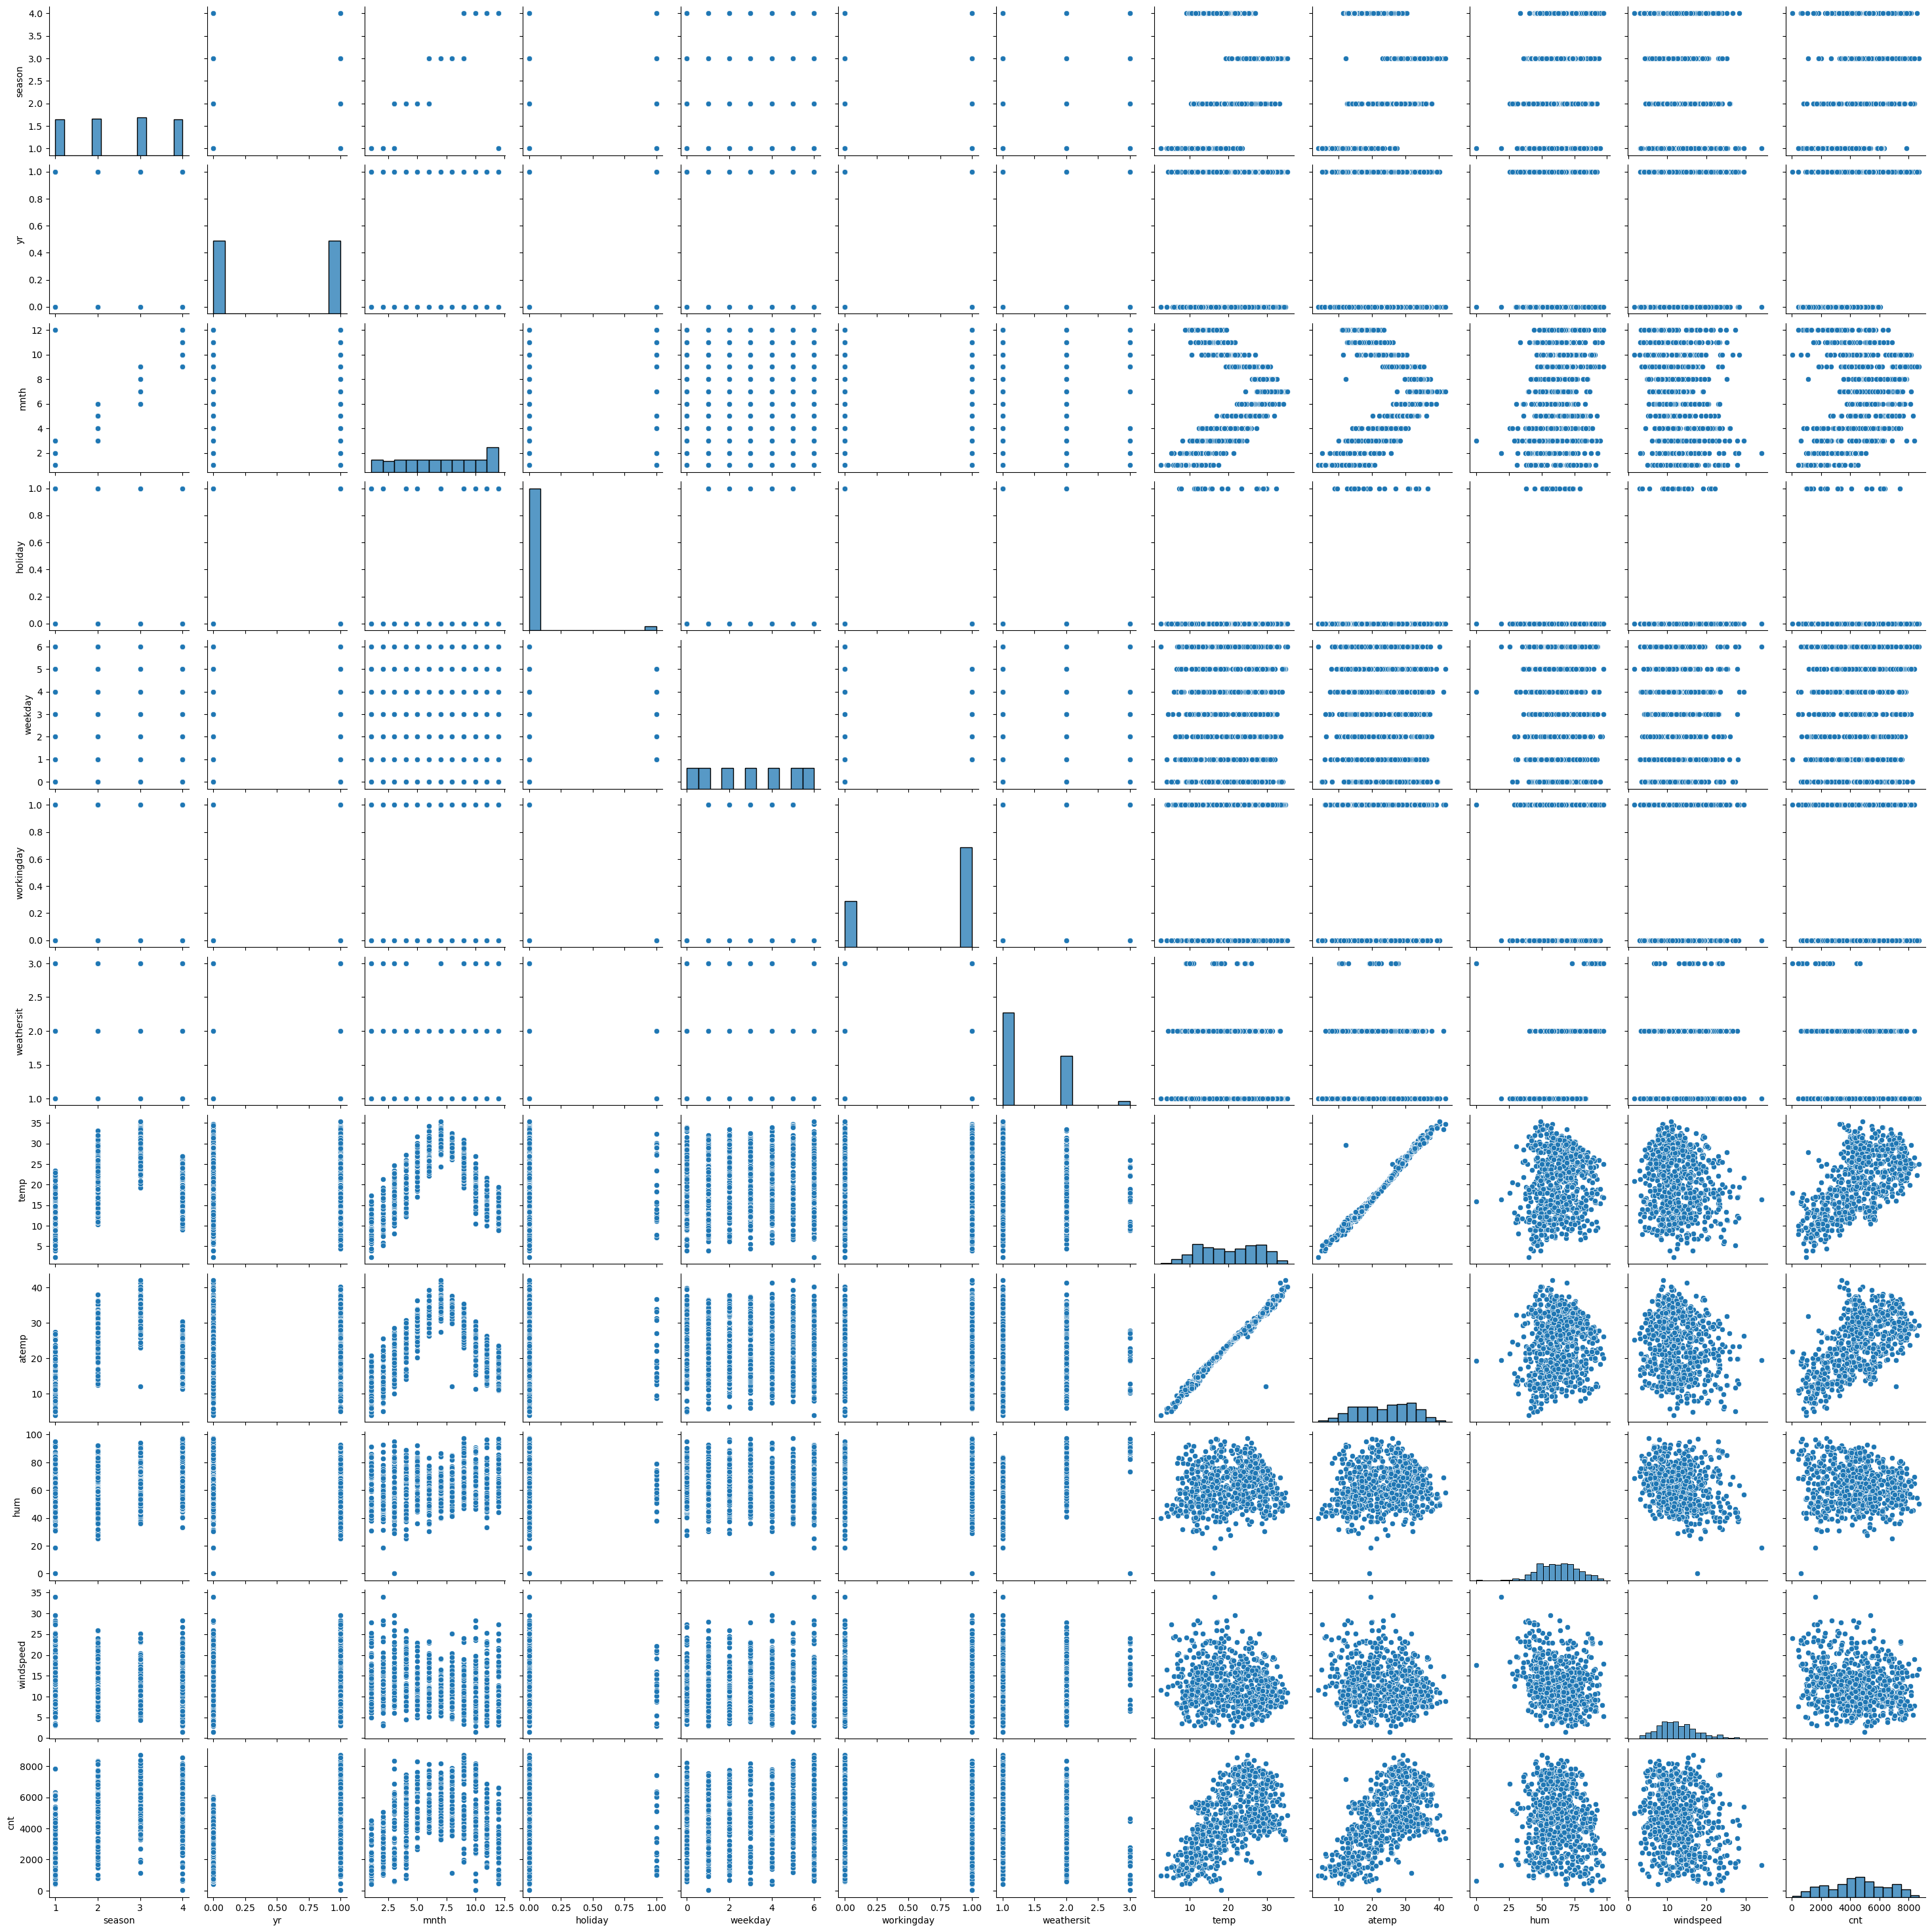

In [143]:
#Let us check how the relationship between the variables 
sns.pairplot(bike_data)
plt.show()

With the visualisations, we can infer that the month, weather and season play a major role for the users. Holidays and working days do not have a higher impact on the users. <br/>
Compared to 2018, bike sharing was more in 2019.
<br/>Count is high during summer months, in good weather conditions, and in certain seasons (likely spring and summer)

# Step 3: Preparing data for Modelling

Mapping the categorical variables to their reference labels using the data dictionary

In [144]:
#Mapping seasons
bike_data['season']=bike_data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [145]:
#mapping weekday 0 to 6
bike_data.weekday=bike_data.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [146]:
#mapping months 1 to 12
bike_data.mnth=bike_data.mnth.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [147]:
#Mapping weathers
bike_data.weathersit=bike_data.weathersit.map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [148]:
#Each of these categories have different levels
#Let us create dummy variables for all these
dummy_vars = bike_data[['season','mnth','weekday','weathersit']]
dummies = pd.get_dummies(dummy_vars,drop_first=True)
# Adding the dummy variables to the original dataset
bike_data = pd.concat([bike_data,dummies],axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,False,False,False,True,False,False,False,False,False,True
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,False,False,False,False,True,False,False,False,False,True
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,True,False,False,False
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [149]:
#we can now drop the categorical variables 
bike_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [150]:
bike_data.shape

(730, 30)

In [151]:
#we had earlier noticed that atemp and temp are highly correlated. Hence we can drop one of them
bike_data.drop(['atemp'],axis=1,inplace=True)
bike_data.shape

(730, 29)

In [152]:
#Let us now check for the total dataset info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    bool   
 8   season_summer          730 non-null    bool   
 9   season_winter          730 non-null    bool   
 10  mnth_Aug               730 non-null    bool   
 11  mnth_Dec               730 non-null    bool   
 12  mnth_Feb               730 non-null    bool   
 13  mnth_Jan               730 non-null    bool   
 14  mnth_July              730 non-null    bool   
 15  mnth_J

### Splitting the data into train and test data sets

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
train, test = train_test_split(bike_data,train_size=0.7,random_state=100)

In [155]:
print(train.shape)
print(test.shape)

(510, 29)
(220, 29)


### Rescaling the variables

We can observe that few of the variable values are of different scales.<br/>
We will have to scale them so that they come under comparable range.<br/>
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 
<br/> We can rescale using either of the two common ways:
 1. Min-Max Scaling
 2. Standardisation

In [156]:
#Since we have noticed that there are not many outliers that need taking care of, we can proceed with min-max scaling for this data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [157]:
train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,4066,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,10.489153,48.3333,23.500518,1796,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,4220,False,True,False,...,False,False,False,True,False,False,False,False,False,True
111,0,0,1,13.803347,72.9583,14.707907,1683,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [158]:
#Let us create a list of numeric vars to apply sclaing
vars = ['cnt','temp','hum','windspeed']
train[vars] = scaler.fit_transform(train[vars])
train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,False,True
111,0,0,1,0.345824,0.751824,0.380981,0.191095,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [159]:
train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the correlation to see the relationship between variables

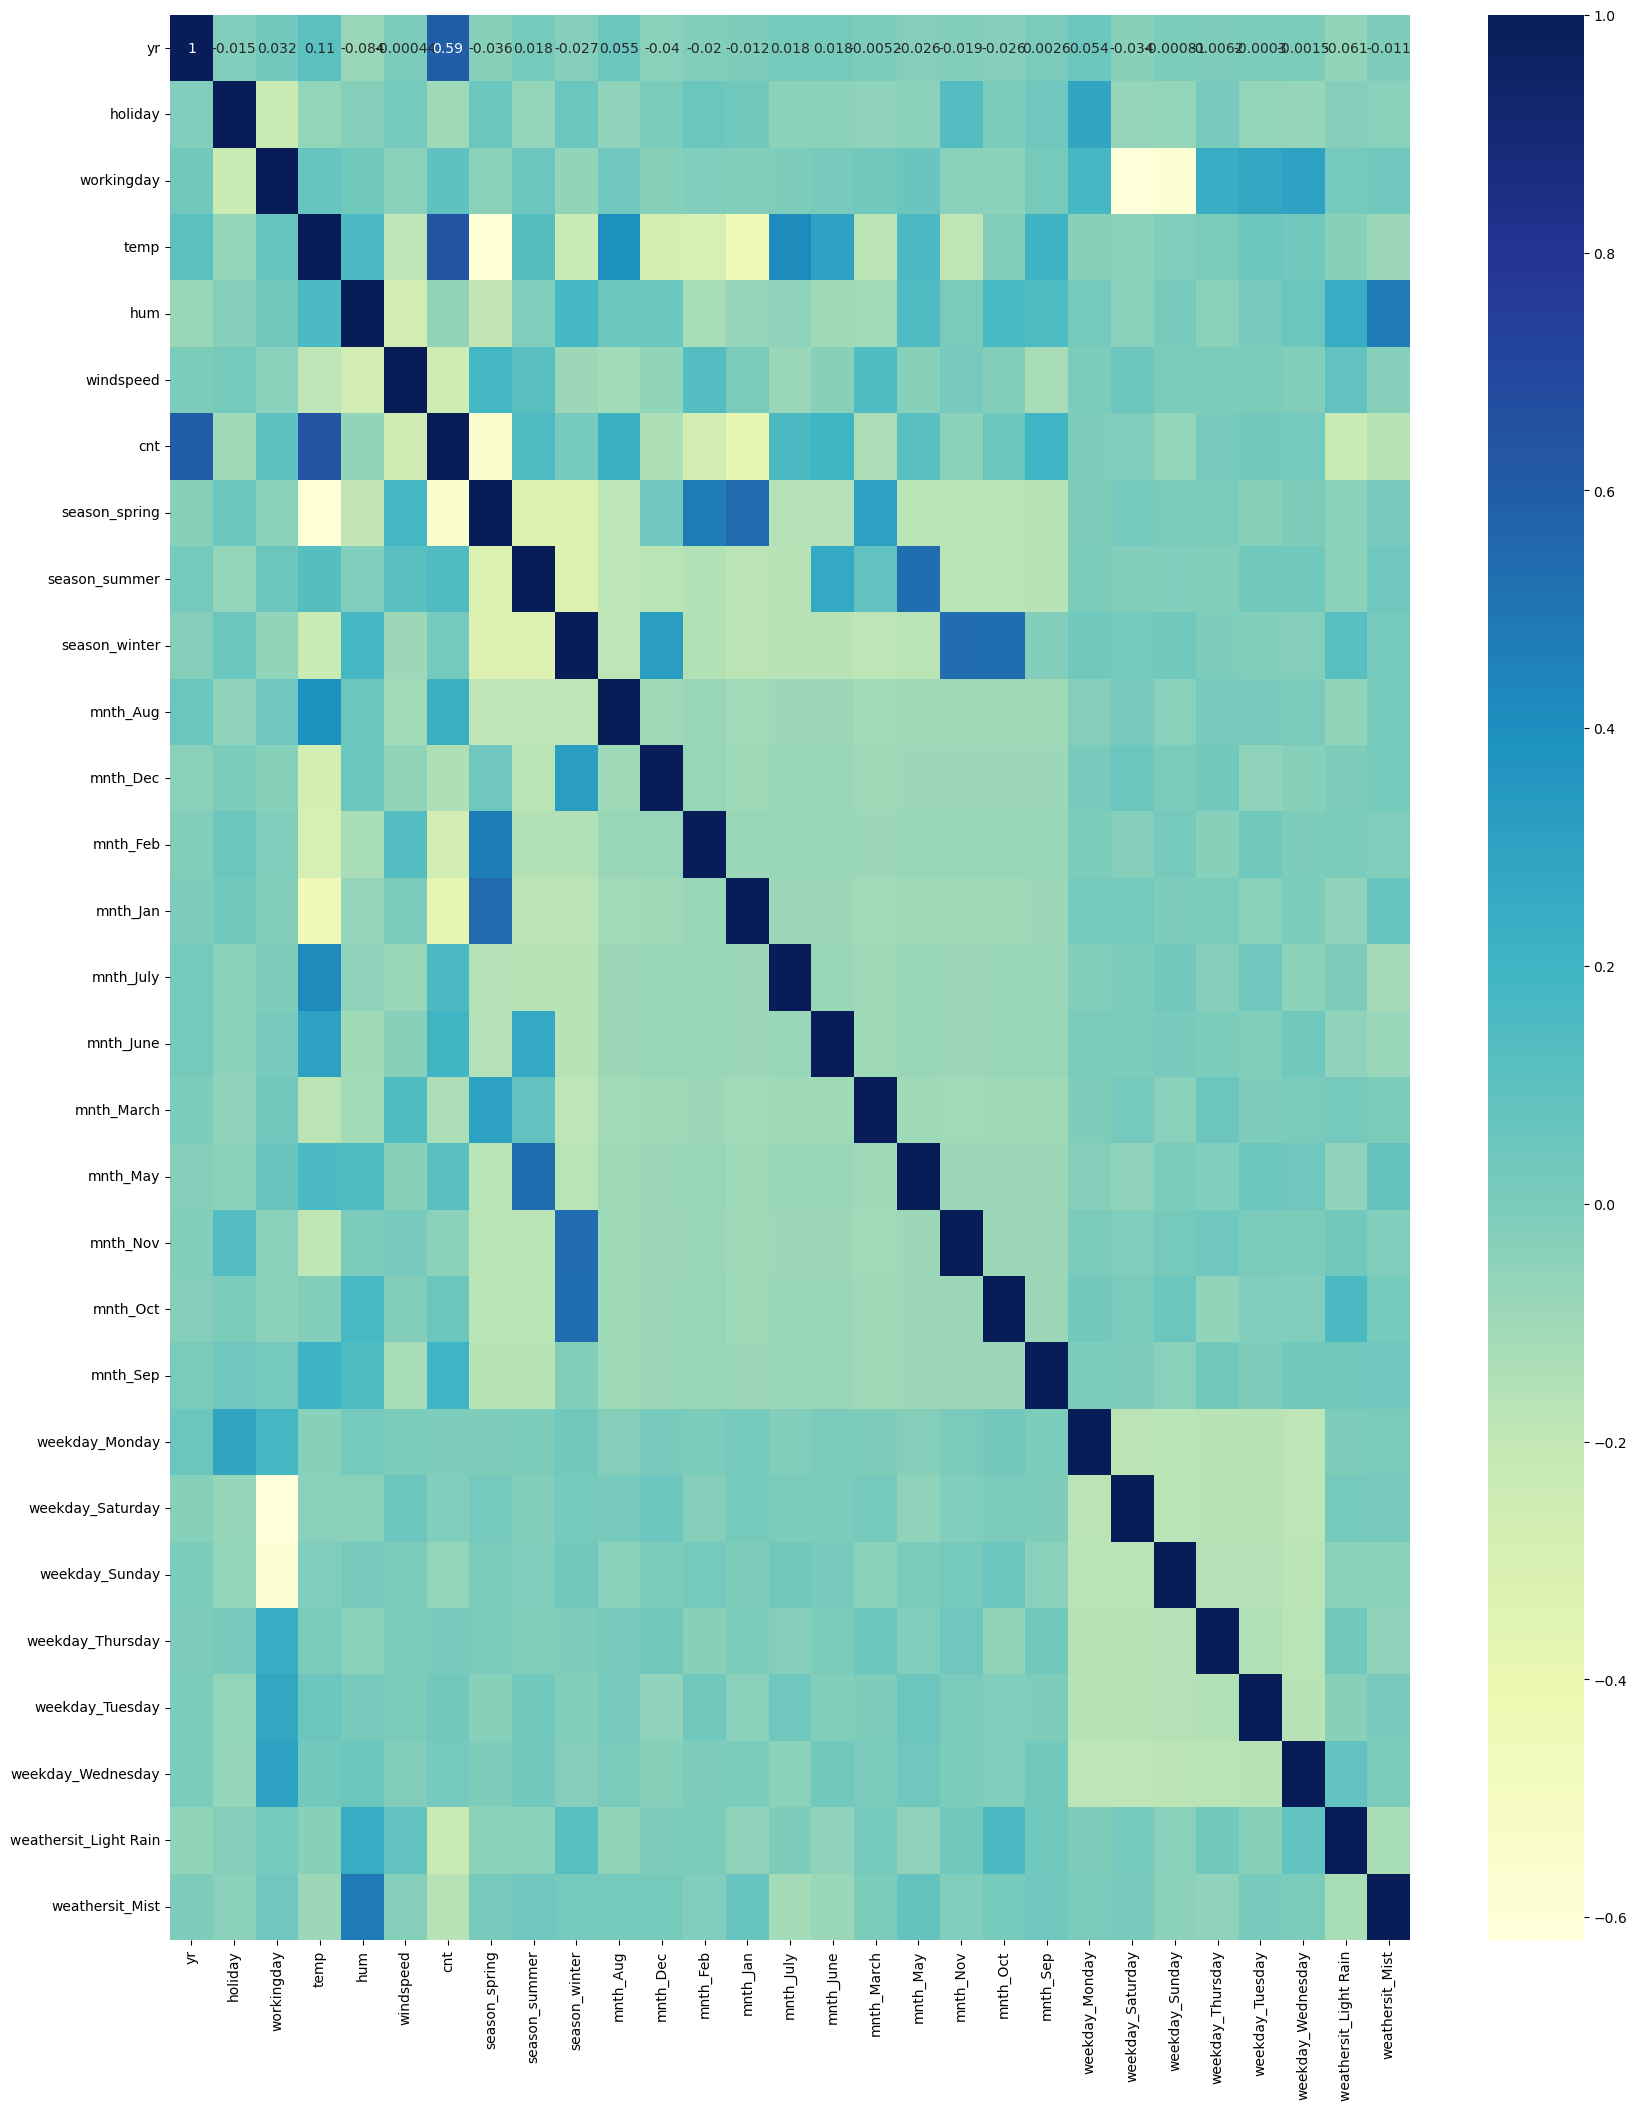

In [160]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

'cnt' shows a moderate to strong positive correlation with 'temp' and 'yr'
<br/>'cnt' has a weak negative correlation with 'windspeed' and 'hum' (humidity), indicating that as windspeed or humidity increases, bike rentals tend to decrease slightly.
<br/>Weather conditions like 'weathersit_Light Snow/Rain' and 'weathersit_Mist + Cloudy' have a negative correlation with 'cnt', suggesting that poor weather reduces bike rentals
<br/>There are several instances of strong correlations between independent variables, such as between months and seasons. This might indicate potential multicollinearity, which should be checked using VIF (Variance Inflation Factor) during model building


##### Splitting into X and Y sets for model building

In [161]:
y_train = train.pop('cnt')
x_train = train
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
111,0,0,1,0.345824,0.751824,0.380981,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [162]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Step 4: Building and Training the model

We will be using a hybrid approach to build the model.<br/>
We will use RFE to select the features and then we will apply the 'statsmodel' to improve and build the model

In [163]:
import statsmodels.api as sm

In [164]:
#Let us build the model with all features
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train, x_train_sm.astype(float))

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()

# The R-squared score gives an indication of how well the model explains the variability in the data.
# This score can be further improved by tuning the model or selecting more relevant features.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.00e-181
Time:                        22:19:40   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2431      0.035      6.888      0.000       0.174       0.312
yr                        0.2324      0.008     28.819      0.000       0.217       0.248
holiday                   0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                0.0962      0.012      7.835      0.000       0.072       0.120
temp                      0.4454      0.046      9.628      0.000       0.354       0.536
hum                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring            -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer             0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter             0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                 0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                  0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sep                  0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Monday           -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Saturday          0.0956      0.014      6.958      0.000       0.069       0.123
weekday_Sunday            0.0413      0.014      2.964      0.003       0.014       0.069
weekday_Thursday         -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tuesday          -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wednesday        -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

##### The Features for which P values are > 0.05 are -> holiday, season_spring, season_summer, mnth_aug, mnth_dec, mnth_feb, mnth_Jan, mnth_July,mnth_June, Mnth_March, mnth_may,mnth_Nov, mnth_Oct,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday.<br/>


In [165]:
#Let us calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sm.astype(float).values,i) for i in range(x_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
23,weekday_Sunday,inf
2,holiday,inf
3,workingday,inf
22,weekday_Saturday,inf
7,season_spring,10.75
9,season_winter,9.44
8,season_summer,8.27
4,temp,7.08
18,mnth_Nov,6.79
19,mnth_Oct,6.47


##### From the above model, the features for which VIF is > 5 are -> season_spring, weekday_Sunday, workingday, holiday, workingday, weekday_Saturday, season_winter, season_summer,mnth_Nov,mnth_Oct, mnth_Aug, mnth_Jan, mnth_Dec, mnth_July

We will now use RFE to pick 15 features to begin with.

In [166]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [167]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [168]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [169]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

##### Using RFE, we got our top 15 features. They are -> yr, holiday, workingday, temp, hum, windspeed, season_spring, season_summer, season_winter, mnth_Jan, mnth_July, mnth_Sep, weekday_Saturday, weathersit_Light_Rain, weathersit_Mist

In [170]:
#Building a model with the RFE selected features 
# Creating X_train dataframe with RFE selected variables

x_train_rfe = x_train[col]

### Adding a Constant Variable
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default

In [171]:
x_train_lm = sm.add_constant(x_train_rfe)
x_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Sep,weekday_Saturday,weathersit_Light Rain,weathersit_Mist
576,1.0,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,True,False,False,False,False
426,1.0,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,False,False,True,False,True
728,1.0,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,False,False,False,False,False
482,1.0,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,False,False,True,False,True
111,1.0,0,0,1,0.345824,0.751824,0.380981,False,True,False,False,False,False,False,False,True


In [172]:
#Building our first linear model
lm_1 = sm.OLS(y_train, x_train_lm.astype(float)).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.22e-191
Time:                        22:20:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2519      0.036      6.969      0.000       0.181       0.323
yr                        0.2305      0.008     28.795      0.000       0.215       0.246
holiday                  -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                0.0433      0.012      3.762      0.000       0.021       0.066
temp                      0.5096      0.034     14.837      0.000       0.442       0.577
hum                      -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer             0.0508      0.015      3.423      0.001       0.022       0.080
season_winter             0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                  0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday          0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We Observe in the model that all p values are < 0.05 
<br/> Let us check the VIF value

In [173]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.astype(float).values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist,2.29
0,yr,2.09
12,weekday_Saturday,1.98


Ideal IVF value is <5 for a feature. Here we notice that hum has a hight IVF value. Let us drop this and build another model

In [174]:
x_train_rfe = x_train_rfe.drop(['hum'], axis=1)

In [175]:
x_train_lm = sm.add_constant(x_train_rfe)
lm_2 = sm.OLS(y_train, x_train_lm.astype(float)).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.60e-188
Time:                        22:20:38   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1737      0.031      5.520      0.000       0.112       0.235
yr                        0.2345      0.008     29.009      0.000       0.219       0.250
holiday                  -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                0.0464      0.012      3.966      0.000       0.023       0.069
temp                      0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer             0.0445      0.015      2.967      0.003       0.015       0.074
season_winter             0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                 -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                  0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday          0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist          -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once again we notice that all p values are < 0.05.<br/>
Let us check the VIF value

In [176]:
#checking VIF value
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.astype(float).values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Saturday,1.97
8,mnth_Jan,1.62
9,mnth_July,1.59


Here we have VIF value value of temp > 5. Let us drop temp and build another model

In [177]:
x_train_rfe = x_train_rfe.drop(['temp'], axis=1)

In [178]:
x_train_lm = sm.add_constant(x_train_rfe)
lm_3 = sm.OLS(y_train, x_train_lm.astype(float)).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          6.44e-154
Time:                        22:20:55   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5444      0.020     27.118      0.000       0.505       0.584
yr                        0.2478      0.009     26.153      0.000       0.229       0.266
holiday                  -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday                0.0478      0.014      3.466      0.001       0.021       0.075
windspeed                -0.1878      0.029     -6.426      0.000      -0.245      -0.130
season_spring            -0.2602      0.018    -14.483      0.000      -0.296      -0.225
season_summer            -0.0427      0.016     -2.651      0.008      -0.074      -0.011
season_winter            -0.0762      0.016     -4.903      0.000      -0.107      -0.046
mnth_Jan                 -0.1026      0.020     -5.112      0.000      -0.142      -0.063
mnth_July                -0.0095      0.021     -0.446      0.656      -0.052       0.032
mnth_Sep                  0.0710      0.020      3.610      0.000       0.032       0.110
weekday_Saturday          0.0562      0.017      3.243      0.001       0.022       0.090
weathersit_Light Rain    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
weathersit_Mist          -0.0882      0.010     -8.688      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#checking VIF value
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.astype(float).values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.29
6,season_winter,1.98
0,yr,1.91
10,weekday_Saturday,1.69
7,mnth_Jan,1.60
12,weathersit_Mist,1.57
8,mnth_July,1.30


P value of mnth_July is > 0.05. Lets drop this and build another model

In [180]:
x_train_rfe = x_train_rfe.drop(['mnth_July'], axis=1)
x_train_lm = sm.add_constant(x_train_rfe)
lm_4 = sm.OLS(y_train, x_train_lm.astype(float)).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.73e-155
Time:                        22:21:09   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5406      0.018     29.655      0.000       0.505       0.576
yr                        0.2478      0.009     26.179      0.000       0.229       0.266
holiday                  -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday                0.0481      0.014      3.489      0.001       0.021       0.075
windspeed                -0.1877      0.029     -6.429      0.000      -0.245      -0.130
season_spring            -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer            -0.0393      0.014     -2.768      0.006      -0.067      -0.011
season_winter            -0.0730      0.014     -5.303      0.000      -0.100      -0.046
mnth_Jan                 -0.1027      0.020     -5.118      0.000      -0.142      -0.063
mnth_Sep                  0.0737      0.019      3.933      0.000       0.037       0.111
weekday_Saturday          0.0564      0.017      3.254      0.001       0.022       0.090
weathersit_Light Rain    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
weathersit_Mist          -0.0879      0.010     -8.685      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, we notice that holiday has a p value > 0.05. Let us drop it and build another model

In [181]:
x_train_rfe = x_train_rfe.drop(['holiday'], axis=1)
x_train_lm = sm.add_constant(x_train_rfe)
lm_5 = sm.OLS(y_train, x_train_lm.astype(float)).fit()
x_train_sm=sm.add_constant(x_train)

lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.01e-155
Time:                        22:21:19   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5332      0.018     30.023      0.000       0.498       0.568
yr                        0.2480      0.009     26.146      0.000       0.229       0.267
workingday                0.0564      0.013      4.353      0.000       0.031       0.082
windspeed                -0.1887      0.029     -6.450      0.000      -0.246      -0.131
season_spring            -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer            -0.0394      0.014     -2.768      0.006      -0.067      -0.011
season_winter            -0.0743      0.014     -5.392      0.000      -0.101      -0.047
mnth_Jan                 -0.1033      0.020     -5.138      0.000      -0.143      -0.064
mnth_Sep                  0.0715      0.019      3.815      0.000       0.035       0.108
weekday_Saturday          0.0648      0.017      3.887      0.000       0.032       0.098
weathersit_Light Rain    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
weathersit_Mist          -0.0874      0.010     -8.623      0.000      -0.107      -0.067
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model all p values are < 0.05. Hence all features are significant. Let us calculate the VIF for the model

In [182]:
#checking VIF value
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.astype(float).values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_spring,2.65
4,season_summer,2.00
0,yr,1.88
5,season_winter,1.73
6,mnth_Jan,1.60
10,weathersit_Mist,1.57
8,weekday_Saturday,1.56
7,mnth_Sep,1.18


### Now the VIFs and p-values both are within an acceptable range. Hence, we finalise this as the final model to proceed with the future prdeictions.

## Step 5: Residual Analysis

To check whether the error terms are normally distributed (which is one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [183]:
y_train_pred = lm_5.predict(x_train_lm)

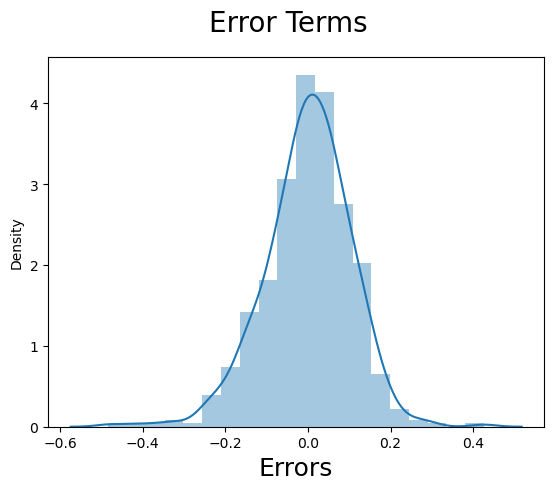

In [184]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Let us also Plot a scatter plot to confirm this

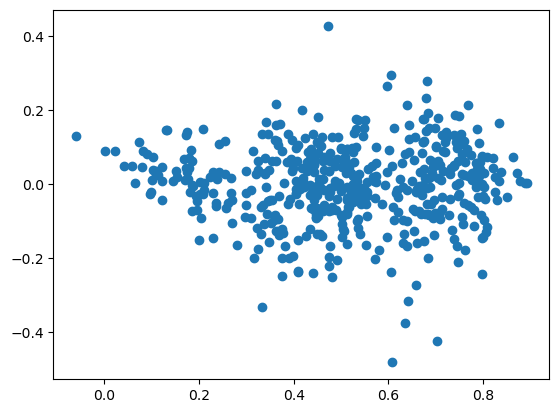

In [185]:
res=y_train-y_train_pred
plt.scatter(y_train_pred, res)

### From both the plots above, we can incur that the residuals follow a normal distribution with mean centered at 0.
Hence this is in accordance with linear regression assumptions.

((array([-2.99813447e+00, -2.71671576e+00, -2.55851315e+00, -2.44635586e+00,
         -2.35848680e+00, -2.28575874e+00, -2.22342522e+00, -2.16869425e+00,
         -2.11977922e+00, -2.07546529e+00, -2.03488747e+00, -1.99740725e+00,
         -1.96253934e+00, -1.92990598e+00, -1.89920709e+00, -1.87020024e+00,
         -1.84268661e+00, -1.81650106e+00, -1.79150490e+00, -1.76758043e+00,
         -1.74462689e+00, -1.72255736e+00, -1.70129629e+00, -1.68077756e+00,
         -1.66094301e+00, -1.64174116e+00, -1.62312624e+00, -1.60505735e+00,
         -1.58749778e+00, -1.57041449e+00, -1.55377759e+00, -1.53755997e+00,
         -1.52173695e+00, -1.50628601e+00, -1.49118651e+00, -1.47641955e+00,
         -1.46196770e+00, -1.44781490e+00, -1.43394629e+00, -1.42034814e+00,
         -1.40700766e+00, -1.39391299e+00, -1.38105306e+00, -1.36841756e+00,
         -1.35599684e+00, -1.34378186e+00, -1.33176415e+00, -1.31993576e+00,
         -1.30828922e+00, -1.29681748e+00, -1.28551391e+00, -1.27437225e+00,

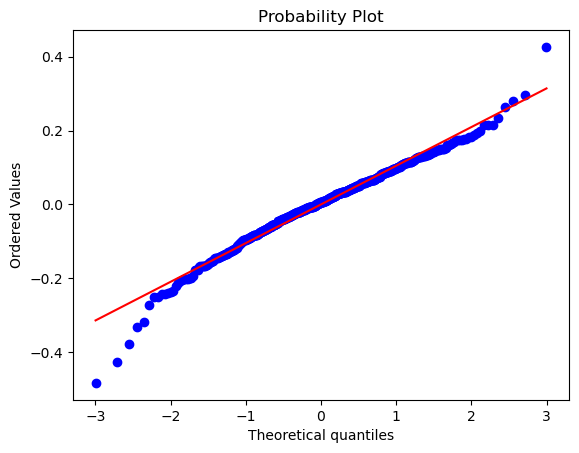

In [186]:
#Let us plot qq plot for error terms and cross verify before moving on
from scipy.stats import probplot

probplot(res.astype(float), plot=plt)

### So, our model is following the assumptions of linear regression and our model is a good predictor.

## Step 6: Making Predictions and Evaluating Model

In [187]:
#Applying scaling on test set
vars = ['cnt','temp','hum','windspeed']
test[vars] = scaler.transform(test[vars])

In [188]:
test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


##### Dividing into X test and y test

In [189]:
y_test = test.pop('cnt')
x_test = test

In [190]:
# Making predictions using the final model

x_test = sm.add_constant(x_test[x_train_rfe.columns])
y_test_pred = lm_5.predict(x_test)

### Calculating R Squared
R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [191]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7791032979320818
r2_score of test dataset 0.741735144131702


We can see that the r_squared on the test set is 0.779 and the r-squared on the trained set 0.741 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

<Axes: xlabel='cnt'>

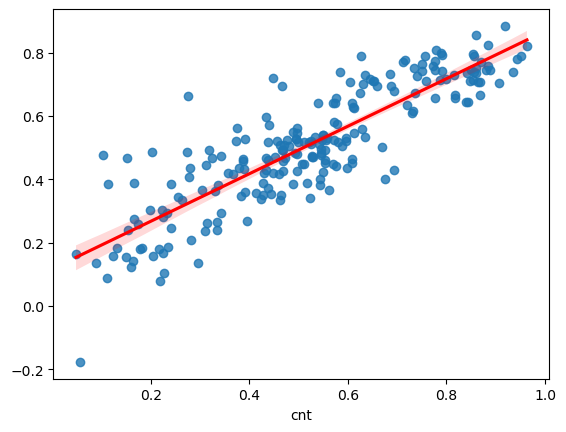

In [194]:
sns.regplot(x = y_test.astype(float),y = y_test_pred.astype(float), line_kws={'color':'red'})

#### Here we plotted predicted values to the test values and we can conclude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [197]:
param = pd.DataFrame(lm_5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.533171
1,yr,0.248004
8,mnth_Sep,0.071471
9,weekday_Saturday,0.064819
2,workingday,0.056374
5,season_summer,-0.039401
6,season_winter,-0.074260
11,weathersit_Mist,-0.087382
7,mnth_Jan,-0.103255


### Final Equation

In [200]:


# Displaying the parameters 
print(lm_5.summary())

# Extracting the coefficients
coefficients = lm_5.params

# Constructing the final model equation
equation = "y = "
for i in range(len(coefficients)):
    if i == 0:
        equation += f"{coefficients[i]:.4f} * {coefficients.index[i]}"
    else:
        equation += f" + {coefficients[i]:.4f} * {coefficients.index[i]}"

print("Final Model Equation:")
print(equation)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.01e-155
Time:                        22:34:36   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

### Final Model Equation:<b>
y = 0.5332 * const + 0.2480 * yr + 0.0564 * workingday + -0.1887 * windspeed + -0.2581 * season_spring + -0.0394 * season_summer + -0.0743 * season_winter + -0.1033 * mnth_Jan + 0.0715 * mnth_Sep + 0.0648 * weekday_Saturday + -0.3023 * weathersit_Light Rain + -0.0874 * weathersit_Mis</b>t


All the positive coefficients like yr, workingday indicate that an increase in these values will lead to an increase in the value of cnt.<br/>
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

## Conclusions From the Model:

 - Company should expand business during Spring, Summer and Winter
 - Clear weather is associated with higher demand for the bike
 - The company needs to cater more to business during January
 - The top factors impacting bikes are weather, temperature, windspeed, holiday and season.
 - There is very minimal change in the demand during holidays. The company should focus more on attracting customers during holidays and weekends
 